In [41]:
import pandas as pd

df_data = pd.read_csv("./dataset_phishing_1.csv")
df_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,label
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,1,0,45,-1,0,1,1,4,legitimate,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,0,0,77,5767,0,0,1,2,phishing,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,0,0,14,4004,5828815,0,1,0,phishing,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,0,0,62,-1,107721,0,0,3,legitimate,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,1,0,224,8175,8725,0,0,6,legitimate,0


In [42]:
from sklearn.model_selection import train_test_split

#Train & Test Set
X= df_data.iloc[: , 1:-2]
y= df_data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=85)
print("\n--Training data samples--")
print(X_train.shape)
print("\n--Test data samples--")
print(X_test.shape)


--Training data samples--
(8572, 87)

--Test data samples--
(2858, 87)


In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8572 entries, 5285 to 4458
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  8572 non-null   int64  
 1   length_hostname             8572 non-null   int64  
 2   ip                          8572 non-null   int64  
 3   nb_dots                     8572 non-null   int64  
 4   nb_hyphens                  8572 non-null   int64  
 5   nb_at                       8572 non-null   int64  
 6   nb_qm                       8572 non-null   int64  
 7   nb_and                      8572 non-null   int64  
 8   nb_or                       8572 non-null   int64  
 9   nb_eq                       8572 non-null   int64  
 10  nb_underscore               8572 non-null   int64  
 11  nb_tilde                    8572 non-null   int64  
 12  nb_percent                  8572 non-null   int64  
 13  nb_slash                    85

In [44]:
X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,...,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0,0,1,0,224,8175,8725,0,0,6


In [45]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: label, dtype: int64

## 하이퍼파라미터 default

In [46]:
from sklearn.tree import DecisionTreeClassifier

#하이퍼파라미터 default
model = DecisionTreeClassifier(random_state=85)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=85)

In [47]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(model, out_file="tree.dot", impurity=True, filled=True)

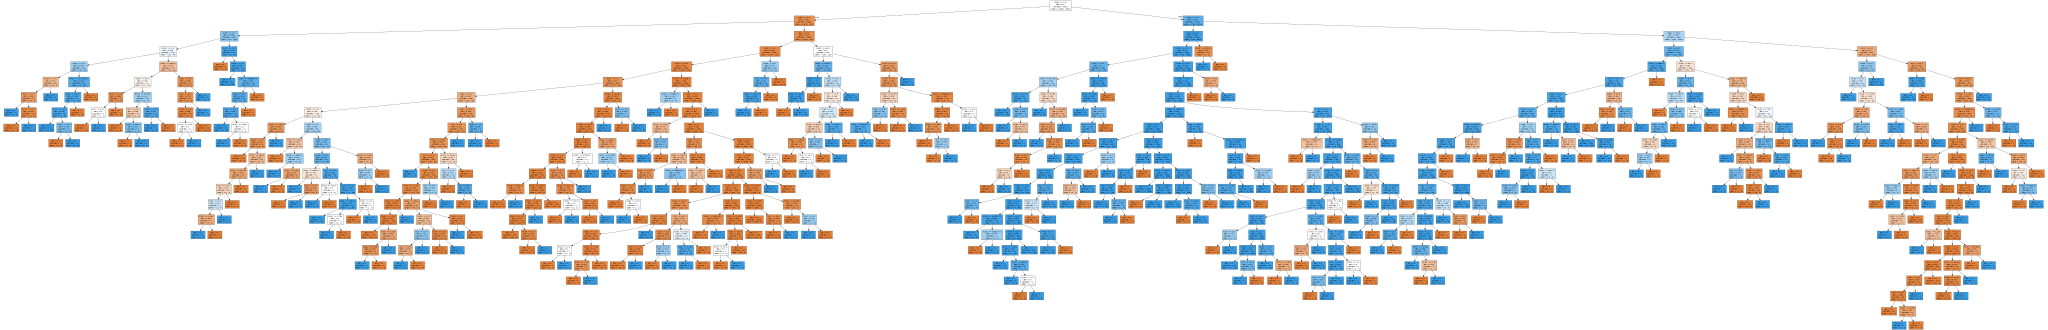

In [48]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [49]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

In [50]:
pred = model.predict(X_test)

In [51]:
import matplotlib.pyplot as plt

def dispConfusionMatrix(y_true, y_pred):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True )
    plt.xlabel('Predicted')
    plt.ylabel('Ground truth')
    plt.show() 

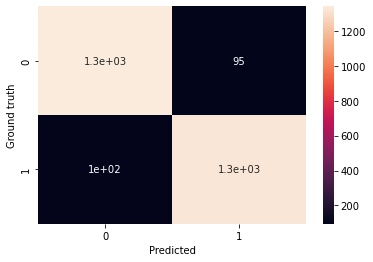

In [52]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

dispConfusionMatrix(y_test, pred)

In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1435
           1       0.93      0.93      0.93      1423

    accuracy                           0.93      2858
   macro avg       0.93      0.93      0.93      2858
weighted avg       0.93      0.93      0.93      2858



In [54]:
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.931


## 하이퍼파라미터 max_depth=3

In [55]:
#하이퍼파라미터 max_depth=3
model = DecisionTreeClassifier(max_depth=3, random_state=85)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=85)

In [56]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(model, out_file="tree.dot", impurity=True, filled=True)

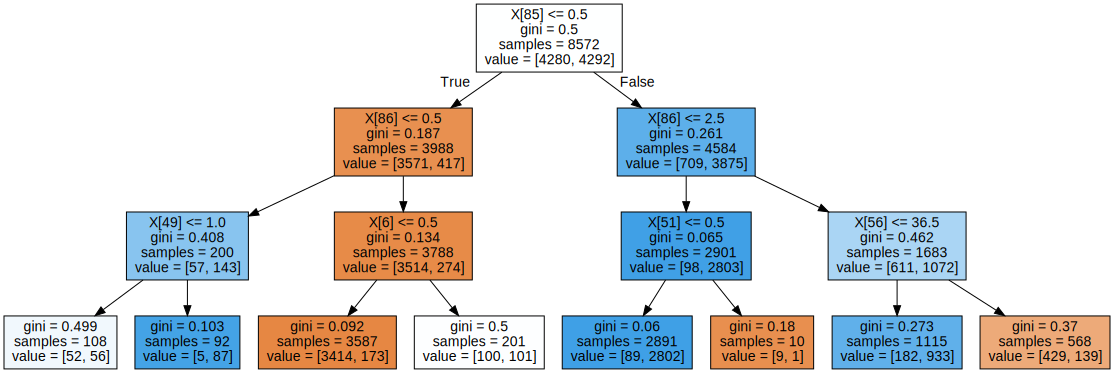

In [57]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [58]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

In [59]:
pred = model.predict(X_test)

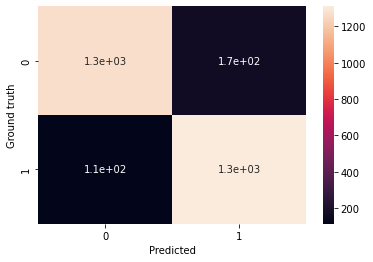

In [60]:
dispConfusionMatrix(y_test, pred)

In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1435
           1       0.89      0.92      0.90      1423

    accuracy                           0.90      2858
   macro avg       0.90      0.90      0.90      2858
weighted avg       0.90      0.90      0.90      2858



In [62]:
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도: 0.914
테스트 세트 정확도: 0.902


## 하이퍼파라미터 max_depth=5

In [ ]:
#하이퍼파라미터 max_depth=3
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(model, out_file="tree.dot", impurity=True, filled=True)

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
pred = model.predict(X_test)

In [ ]:
dispConfusionMatrix(y_test, pred)

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

## 하이퍼파라미터 max_depth=7

In [23]:
#하이퍼파라미터 max_depth=3
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [24]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(model, out_file="tree.dot", impurity=True, filled=True)

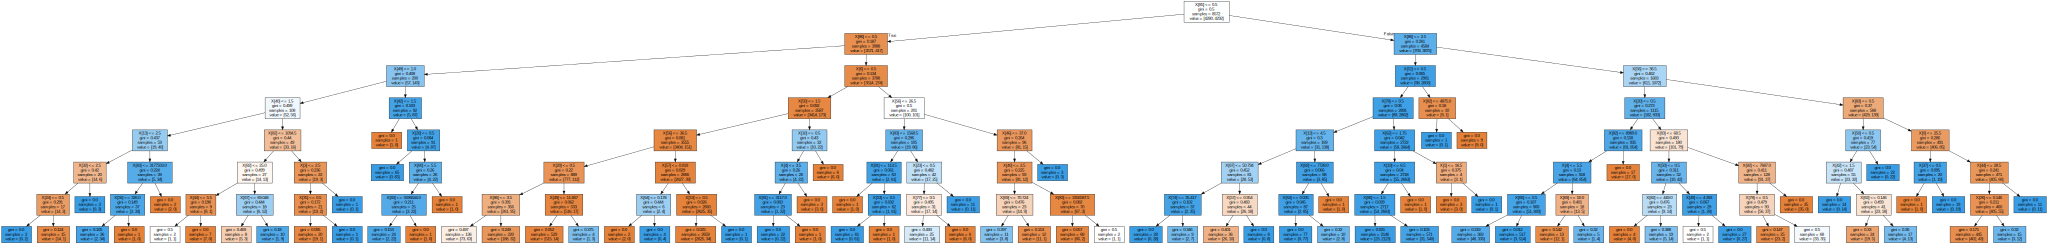

In [25]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [26]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

In [27]:
pred = model.predict(X_test)

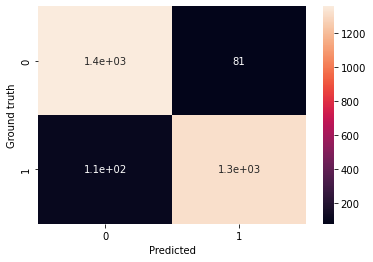

In [28]:
dispConfusionMatrix(y_test, pred)

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1435
           1       0.94      0.92      0.93      1423

    accuracy                           0.93      2858
   macro avg       0.93      0.93      0.93      2858
weighted avg       0.93      0.93      0.93      2858



In [30]:
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도: 0.955
테스트 세트 정확도: 0.934


## 하이퍼파라미터 max_depth=10

In [63]:
#하이퍼파라미터 max_depth=3
model = DecisionTreeClassifier(max_depth=10, random_state=85)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=85)

In [64]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(model, out_file="tree.dot", impurity=True, filled=True)

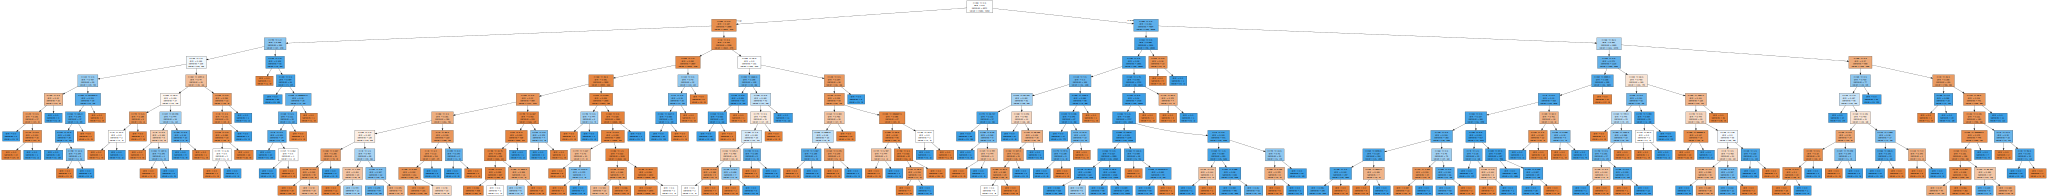

In [65]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [66]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

In [67]:
pred = model.predict(X_test)

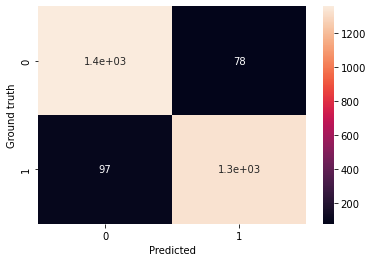

In [68]:
dispConfusionMatrix(y_test, pred)

In [69]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1435
           1       0.94      0.93      0.94      1423

    accuracy                           0.94      2858
   macro avg       0.94      0.94      0.94      2858
weighted avg       0.94      0.94      0.94      2858



In [70]:
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도: 0.978
테스트 세트 정확도: 0.939


## 하이퍼파라미터 max_depth=12

In [ ]:
#하이퍼파라미터 max_depth=3
model = DecisionTreeClassifier(max_depth=12)
model.fit(X_train, y_train)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(model, out_file="tree.dot", impurity=True, filled=True)

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
pred = model.predict(X_test)

In [ ]:
dispConfusionMatrix(y_test, pred)

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

## 하이퍼파라미터 max_depth=13

In [ ]:
#하이퍼파라미터 max_depth=3
model = DecisionTreeClassifier(max_depth=13)
model.fit(X_train, y_train)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(model, out_file="tree.dot", impurity=True, filled=True)

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
pred = model.predict(X_test)

In [ ]:
dispConfusionMatrix(y_test, pred)

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

## 하이퍼파라미터 max_depth=14

In [ ]:
#하이퍼파라미터 max_depth=3
model = DecisionTreeClassifier(max_depth=14)
model.fit(X_train, y_train)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(model, out_file="tree.dot", impurity=True, filled=True)

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
pred = model.predict(X_test)

In [ ]:
dispConfusionMatrix(y_test, pred)

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

## max_depth에 따른 정확도 정리

In [72]:
from sklearn.metrics import accuracy_score

max_depths = [5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 20]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=85)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 5 정확도 : 0.9300
max_depth = 6 정확도 : 0.9311
max_depth = 7 정확도 : 0.9321
max_depth = 8 정확도 : 0.9384
max_depth = 10 정확도 : 0.9388
max_depth = 11 정확도 : 0.9433
max_depth = 12 정확도 : 0.9377
max_depth = 13 정확도 : 0.9370
max_depth = 14 정확도 : 0.9360
max_depth = 16 정확도 : 0.9318
max_depth = 20 정확도 : 0.9332


In [84]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 20]
         }

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
GridSearchCV 최고 평균 정확도 수치: 0.9381
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 10}


In [85]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('Desicion Tree 예측 정확도: {0:.4f}'.format(accuracy))

Desicion Tree 예측 정확도: 0.9377


## min_samples_split 추가

In [77]:
max_depths = [5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 20]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 5 정확도 : 0.9300
max_depth = 6 정확도 : 0.9311
max_depth = 7 정확도 : 0.9325
max_depth = 8 정확도 : 0.9370
max_depth = 10 정확도 : 0.9398
max_depth = 11 정확도 : 0.9419
max_depth = 12 정확도 : 0.9353
max_depth = 13 정확도 : 0.9374
max_depth = 14 정확도 : 0.9356
max_depth = 16 정확도 : 0.9349
max_depth = 20 정확도 : 0.9321


In [79]:
params = {
    'max_depth' : [5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 20],
    'min_samples_split' : [16, 24]
}

dt_clf = DecisionTreeClassifier()
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
GridSearchCV 최고 평균 정확도 수치: 0.9368
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 11, 'min_samples_split': 16}


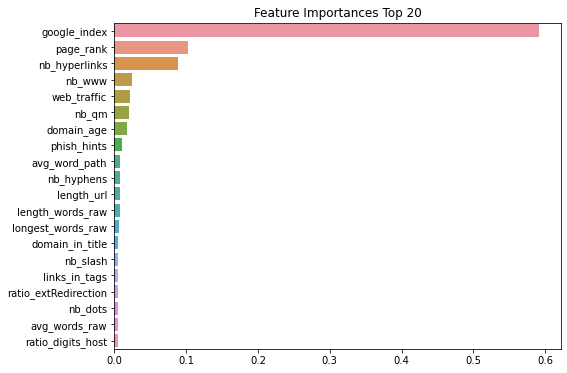

In [80]:
import seaborn as sns

feature_importance_values = best_df_clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()